# Comparison of different clustering algorithms
with a focus on Mean Shift and Fuzzy C-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.density import MeanShift, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

In [3]:
#load fuzzy dataset and pre-process
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]

### Clustering on different data sets

In [4]:
def format_subplots():
    plt.figure(figsize=(30,8))
    ax1 = plt.subplot2grid((2,5), (0, 0))
    ax2 = plt.subplot2grid((2,5), (0, 1))
    ax3 = plt.subplot2grid((2,5), (0, 2))
    ax4 = plt.subplot2grid((2,5), (0, 3))
    ax5 = plt.subplot2grid((2,5), (0, 4))
    ax6 = plt.subplot2grid((2,5), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    row_labels=[ 'Computing time [s]', 'iter = # of iterations',  'k = # of clusters', 'Mean cluster-center distance']
    column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return ax, row_labels, column_labels

In [5]:
def format_table_data(dataset,estimatecluster, saveas = 'images/tabledataset.png'):
    ax, row_labels, column_labels = format_subplots()
    row_labels = ['       n = # of datapoints', 'd = dimension', 'estimated # of clusters']
    datasetresults = np.zeros((3,np.shape(dataset)[0]))
    for i in range(np.shape(dataset)[0]):
        data = dataset[i]
        datasetresults[ 0,i] = int(np.size(data,0))
        datasetresults[ 1,i] = int(np.size(data,1))
        ax[i].scatter(data[:,0],data[:,1],alpha=.3)
        ax[i].axis('off')
    datasetresults[2,:] = estimatecluster

    df = pd.DataFrame(datasetresults[:,:],row_labels , column_labels)
    ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu",annot_kws={"size": fontsizeset})
    plt.title('Data sets', fontsize=fontsizeset)
    plt.show()
    #plt.savefig(saveas)
    

In [6]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

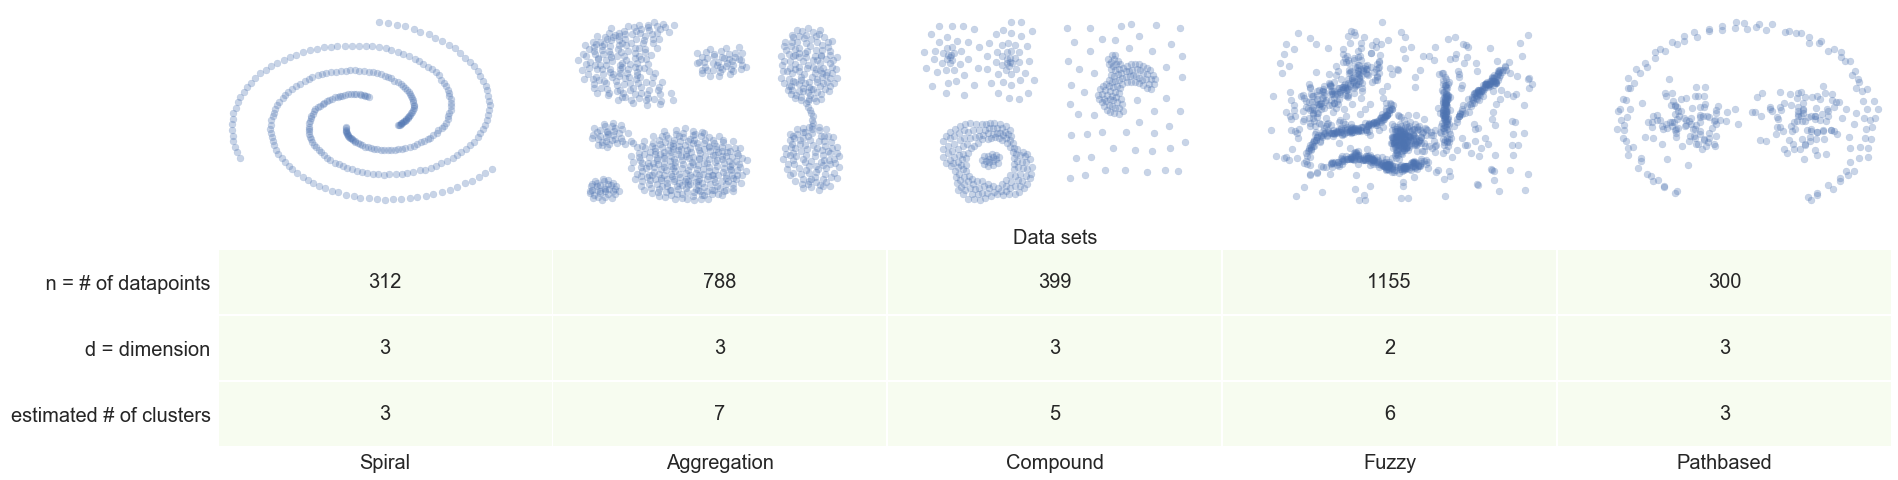

In [7]:
format_table_data(dataset, np.array([3,7,5,6,3]))

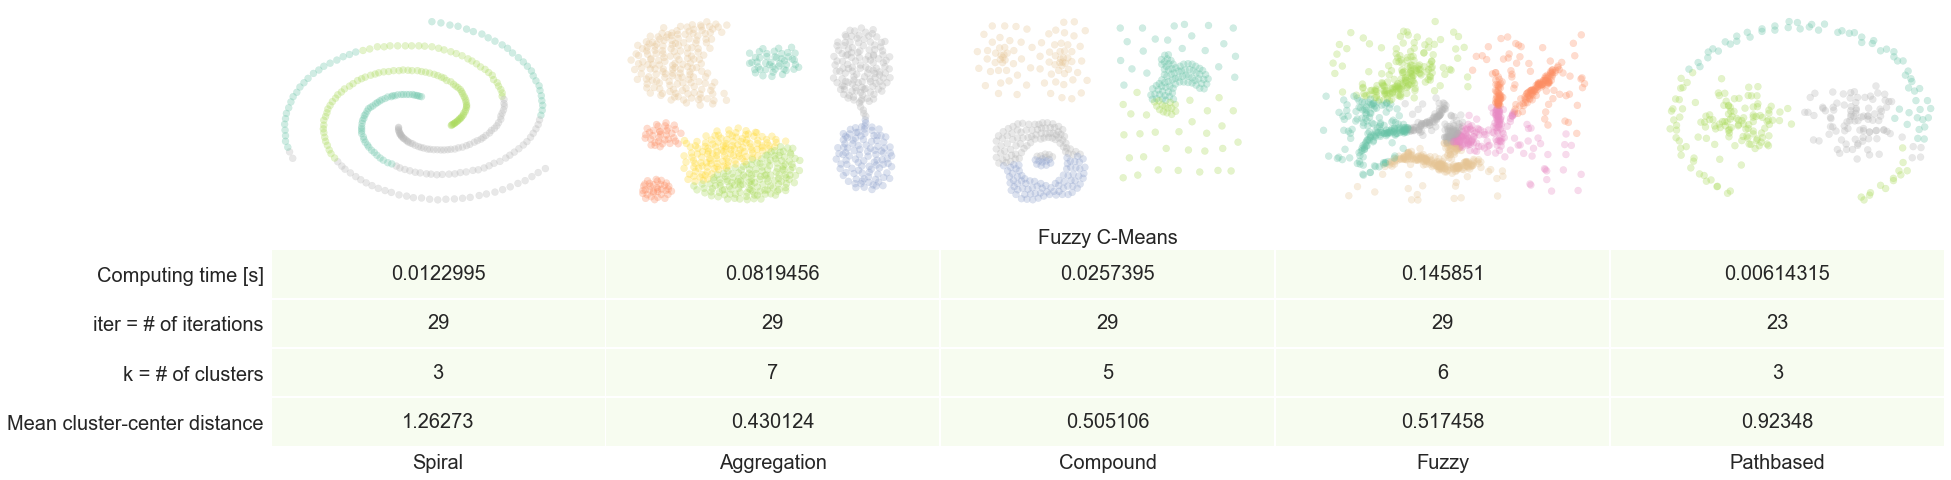

In [8]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = FuzzyCMeans(data,c, verbose = False )
    f.fit()
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = f._time
    results[ 1,i] = f._iter 
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('Fuzzy C-Means')
plt.show()
#plt.savefig('images/tablefuzzy.png')

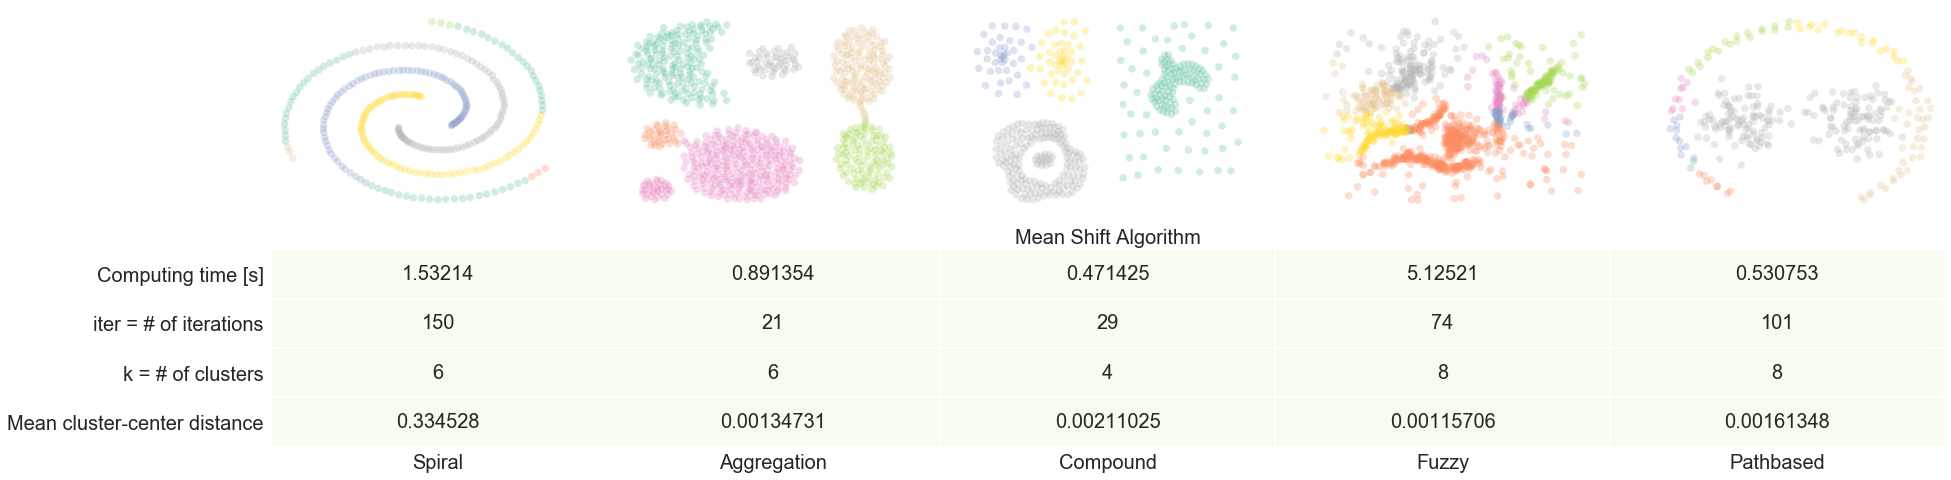

In [9]:
ax, row_labels, column_labels = format_subplots()
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    ms = MeanShift(data, verbose = False)
    ms.fit()
    labels = ms._cluster_labels
    results[3,i] = np.mean(ms._cluster_dist)
    results[0,i] = ms._time
    results[1,i] = ms._iter 
    results[2,i] = max(labels)
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')

df = pd.DataFrame(results[:,:], row_labels, column_labels)

ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")

plt.title('Mean Shift Algorithm')
plt.show()
#plt.savefig('images/tablemeanshift.png')

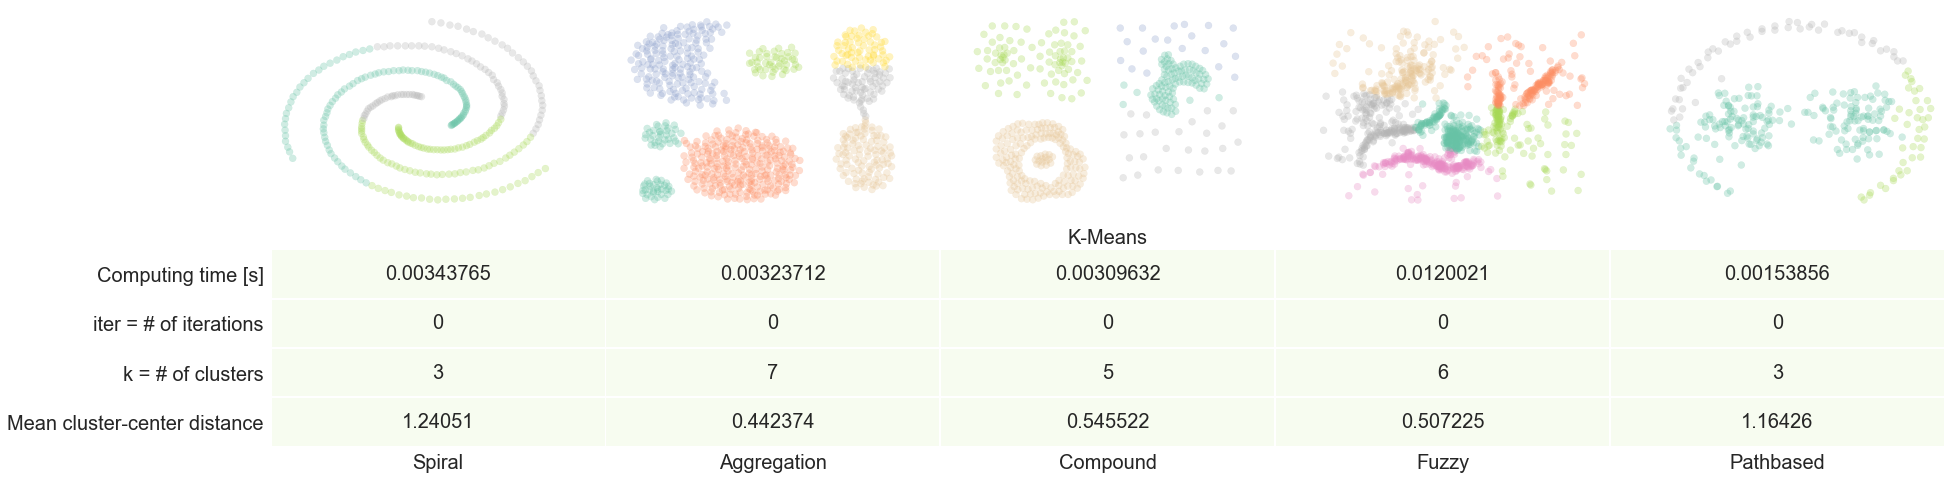

In [10]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    start_time = timer()
    f = KMeans(data,c, verbose = False )
    f.fit()
    time_taken = timer() - start_time
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = time_taken
    results[ 1,i] = 0 #f._iter, need to add iteration counter to kmeans code, just set to zero for now
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('K-Means')
plt.show()
#plt.savefig('images/tablekmeans.png')

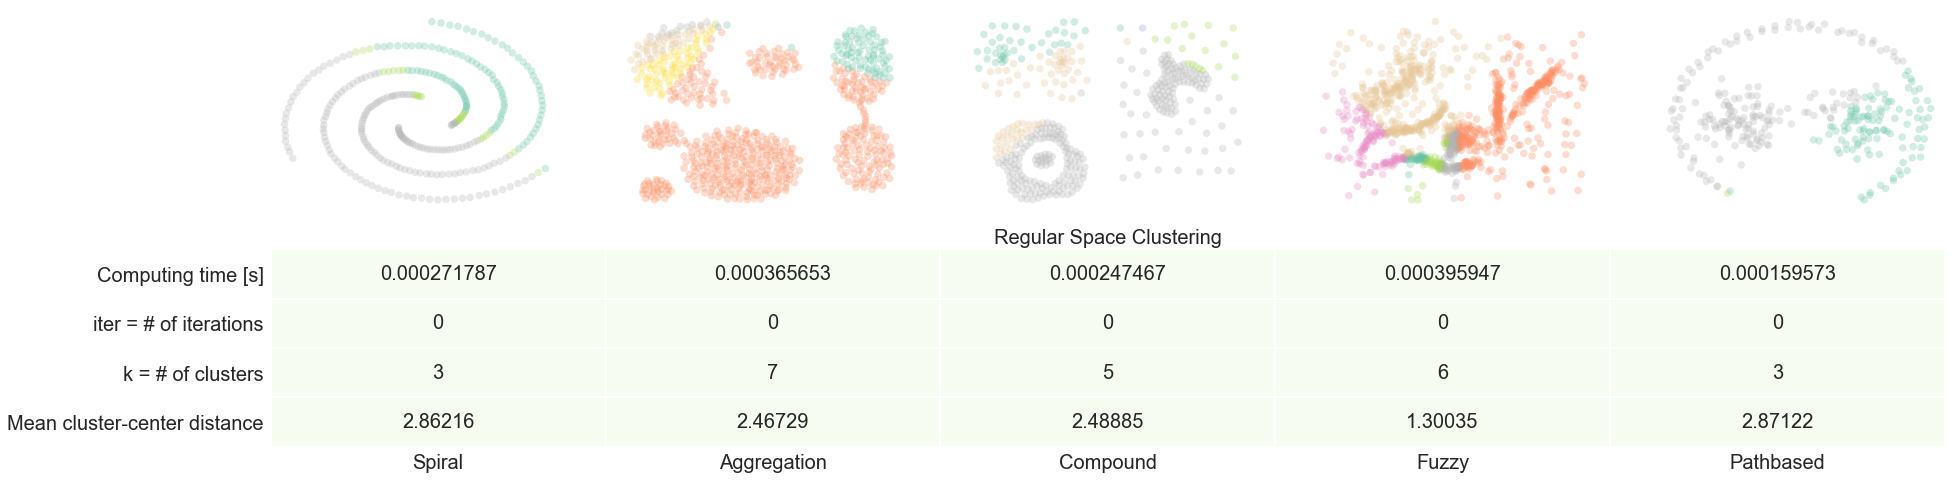

In [11]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    start_time = timer()
    f = Regspace(data,c,0.05, verbose=False)
    f.fit()
    time_taken = timer() - start_time
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = time_taken
    results[ 1,i] = 0 #f._iter, need to add iteration counter to kmeans code, just set to zero for now
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu")
plt.title('Regular Space Clustering')
plt.show()
#plt.savefig('images/tableregspace.png')

## In more detail: Mean Shift Algorithm

In [12]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 35
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

In [13]:
def plot_mean_shift(data, labels, results, bandwidth, outliers, save=None, name = 'images/meanshiftpaper.png'): 
 
    f, axarr = plt.subplots(1,4, figsize=(30,8))

    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[0].axis('off')

    axarr[3].scatter(data[:,0],data[:,1],alpha=.6, c = labels, cmap='Set2')
    if outliers >0:
        axarr[3].axis('off')
    else:
        axarr[3].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
        axarr[3].axis('off')   
    
    [X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
    ma=np.max(np.max(Z)) #max of density
    mi=np.min(np.min(Z)) #min of density
    levels=0.8*np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
    axarr[1].contour(X,Y,Z, levels)
    axarr[1].scatter(data[:,0],data[:,1],alpha=.08)
    #axarr[1].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
    axarr[1].axis('off')
    
    axarr[2].contour(X,Y,Z, levels)
    #axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=1, alpha=1)
    #axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
    axarr[2].scatter(results[:,0], results[:,1],alpha=1)
    axarr[2].axis('off')  
    
    axarr[0].set_title('Data points', fontsize=fontsizeset)
    axarr[3].set_title('Clustering', fontsize=fontsizeset)
    axarr[2].set_title('Shifted points', fontsize=fontsizeset)
    axarr[1].set_title('Kernel density estimation', fontsize=fontsizeset)
    plt.tight_layout()
    if save == None:
        plt.show()
    else: 
        plt.savefig(name)

116 iterations until termination.
Used bandwidth: 0.250000
Finished after 4.4104072533333465
Number of clusters found: 11.000000
There is/are 2.000000 outliers
Max within cluster distance to center: 0.165079
Mean within cluster distance to center: 0.002562
Sum of within cluster squared errors: 0.064314


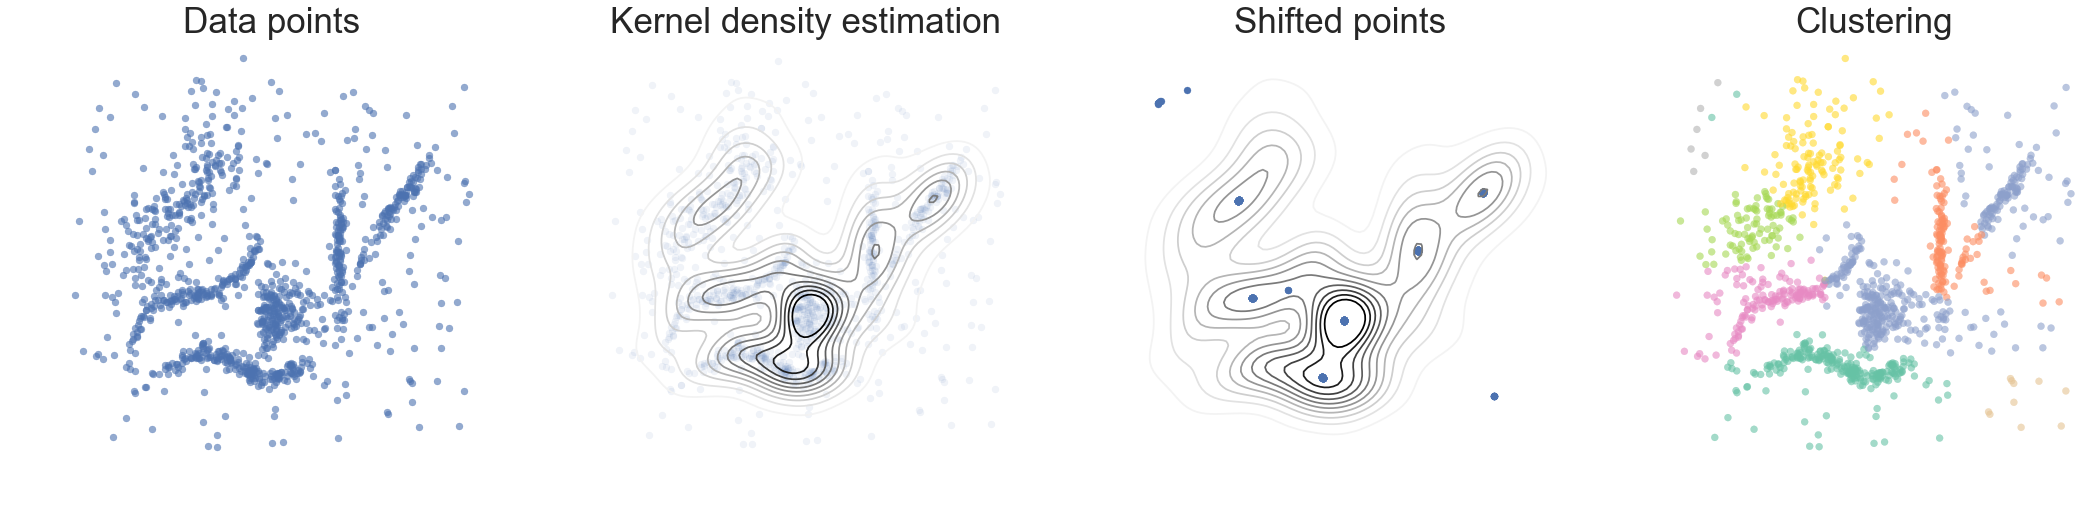

In [22]:
data = fuzzy
bandwidth = 0.25
ms = MeanShift(data, bandwidth)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper.pdf')

21 iterations until termination.
Used bandwidth: 0.350000
Finished after 1.2170265599999937
Number of clusters found: 7.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.003157
Mean within cluster distance to center: 0.001893
Sum of within cluster squared errors: 0.003319


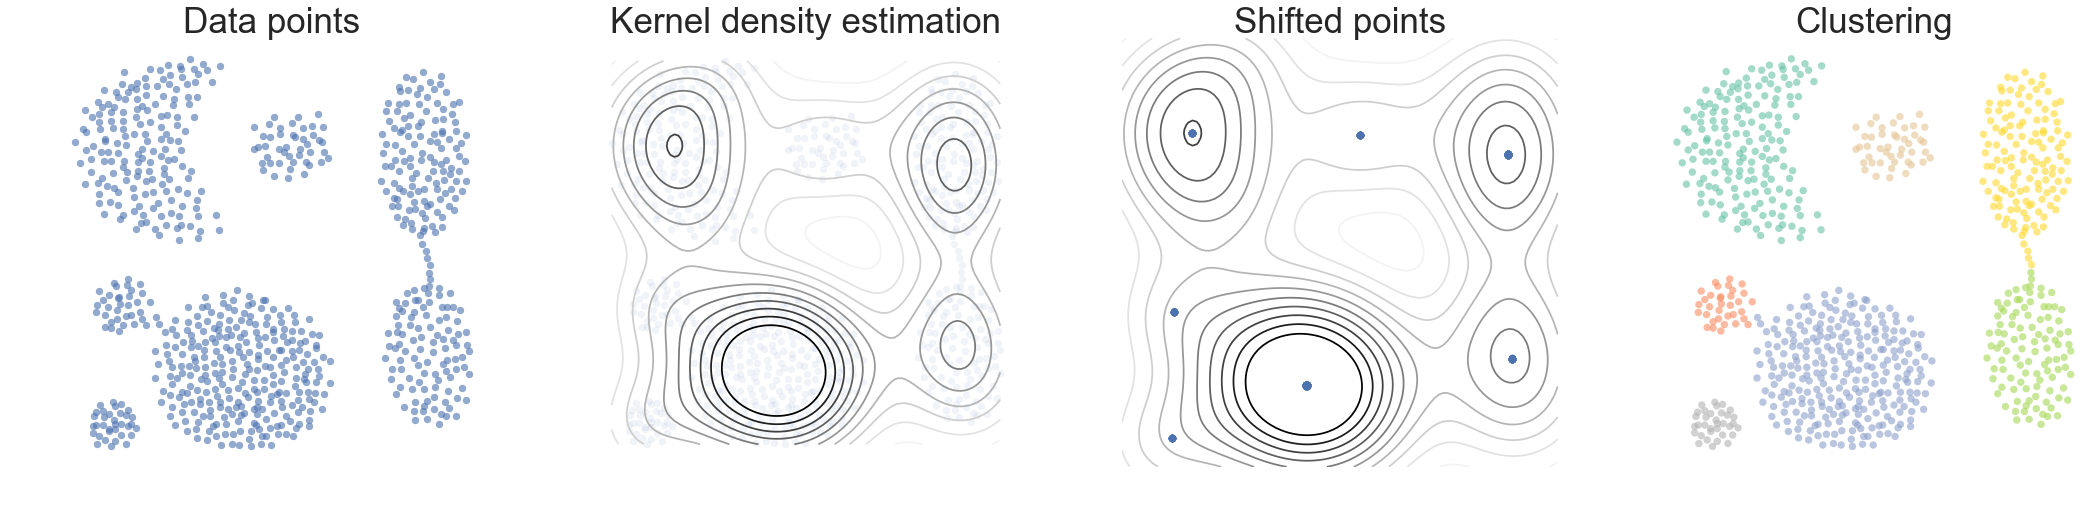

In [21]:
data = load_aggregation_data(scale = 'True')
ms = MeanShift(data,0.35)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper2.pdf')

Bandwidth estimation only works well for scaled data, preprocess the data first using scale_data() if that is not the case.
29 iterations until termination.
Used bandwidth: 0.425043
Finished after 0.6139059200000077
Number of clusters found: 4.000000
There is/are 0.000000 outliers
Max within cluster distance to center: 0.005595
Mean within cluster distance to center: 0.002110
Sum of within cluster squared errors: 0.003052


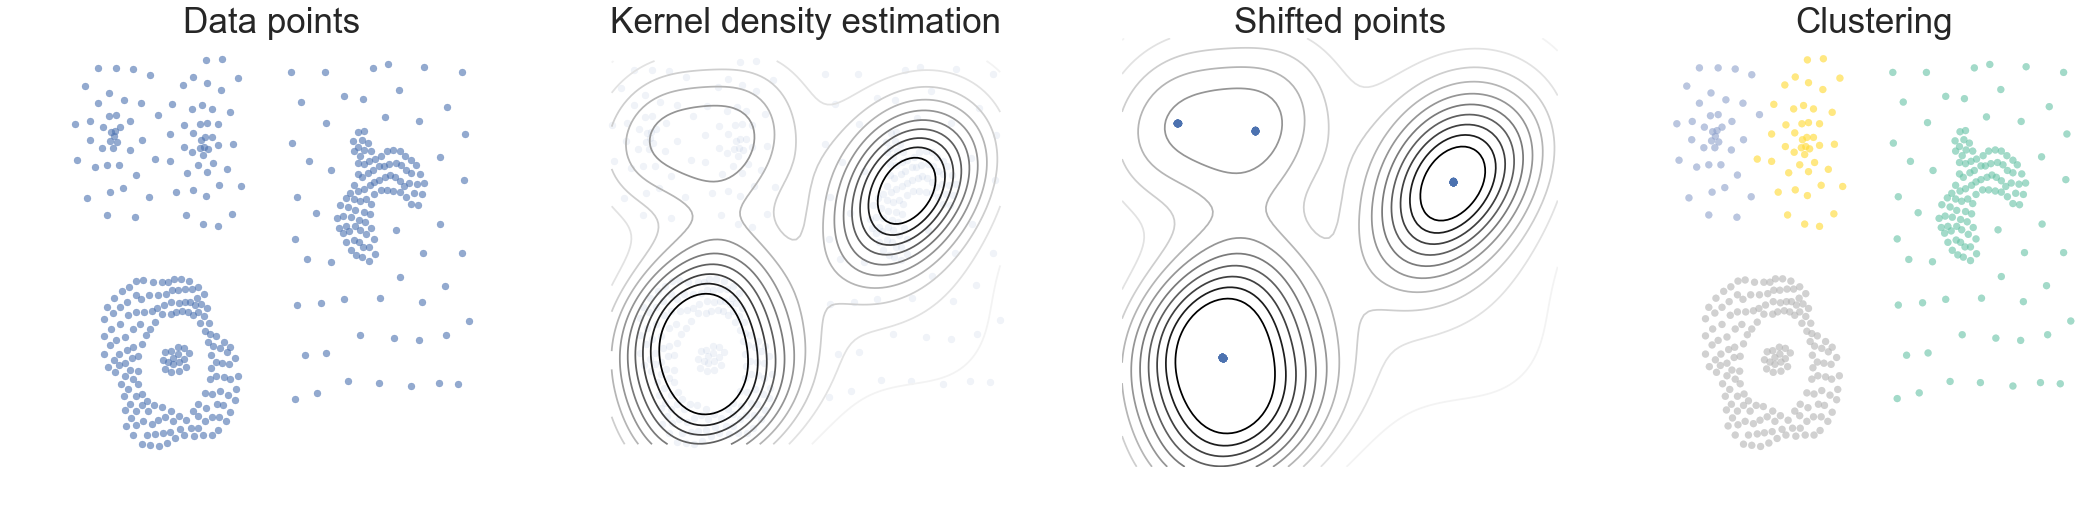

In [23]:
data=load_compound_data(scale = 'True')
ms = MeanShift(data)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 
results = ms._results
plot_mean_shift(data, labels, results, bandwidth, outliers, save=True, name = 'images/meanshiftpaper3.pdf')

## In more detail: Fuzzy C-means

In [17]:
def plot_fuzzy_cmeans(data, labels, Uk, c, save=None, name='images/fuzzy.pdf'):
    f, axarr = plt.subplots(1,3, figsize=(30,10))
    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    
    
    for i in np.arange(c):
        axarr[1].scatter(data[:,0],data[:,1],alpha=.1,s = np.pi * (15 * Uk[i,:])**2, cmap='Set2')#,c=len(labels)*[i]
    
        axarr[2].scatter(data[np.where( labels==i ),0],data[np.where( labels==i ),1],alpha=.6, cmap='Set2')
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Data points', fontsize=fontsizeset)
    axarr[2].set_title('Hard clustering', fontsize=fontsizeset)
    axarr[1].set_title('Fuzzy clustering', fontsize=fontsizeset)
    plt.tight_layout()
    if save == None:
        plt.show()
    else: 
        plt.savefig(name)

Finished after 0.1989990399999897
29 iterations until termination.
Max within cluster distance to center: 2.624571
Mean within cluster distance to center: 0.492396
Sum of within cluster squared errors: 423.829494


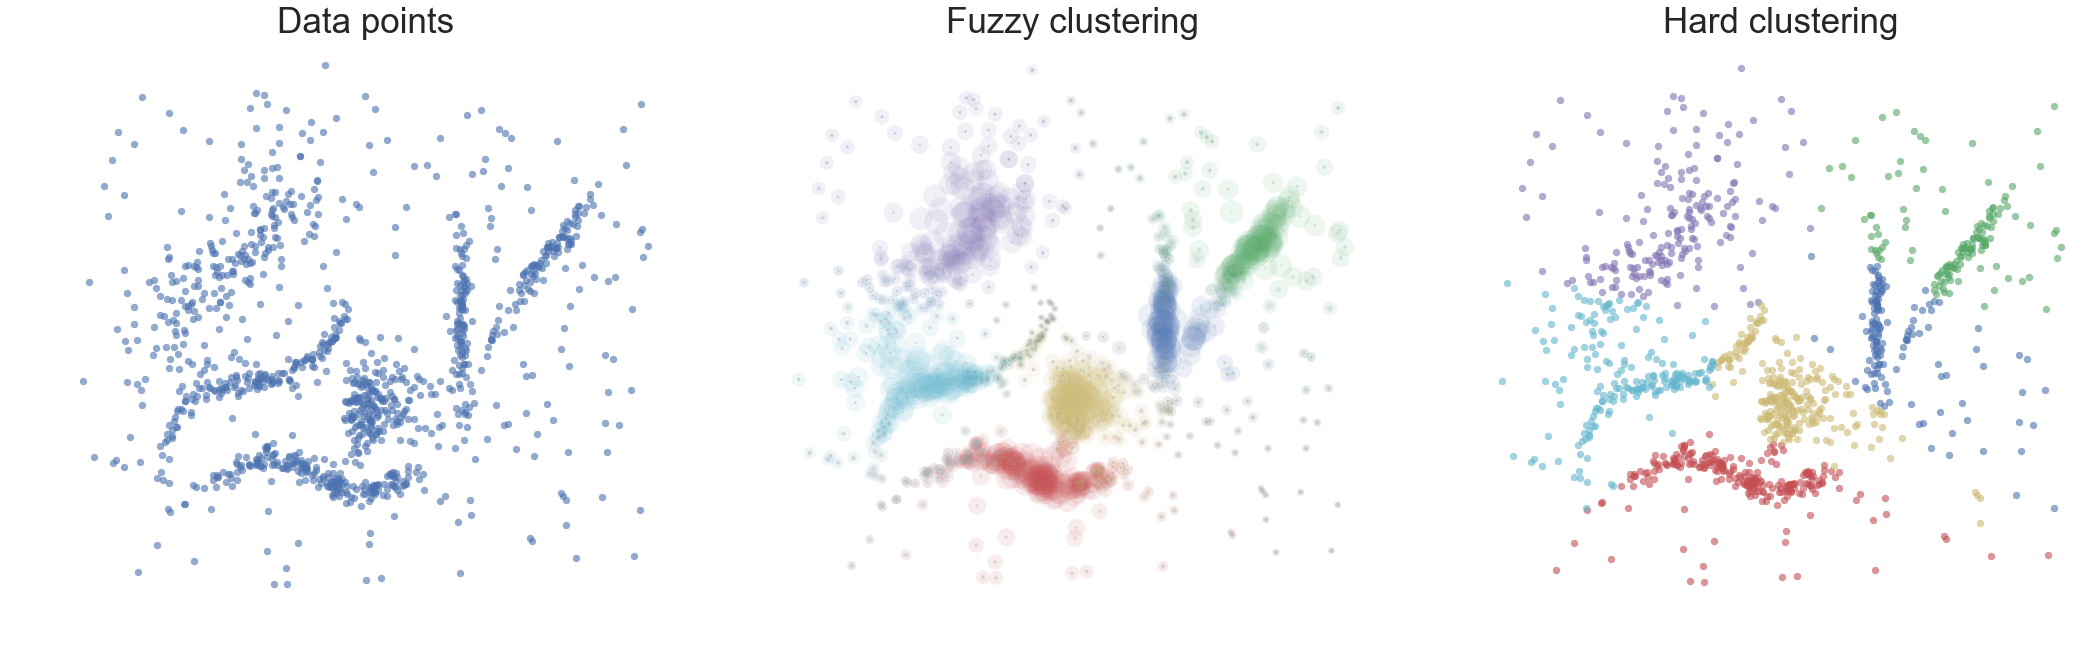

In [24]:
data = fuzzy
c=6
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypaper.pdf')

Finished after 15.341291946666669
29 iterations until termination.
Max within cluster distance to center: 0.838296
Mean within cluster distance to center: 0.203024
Sum of within cluster squared errors: 712.152951


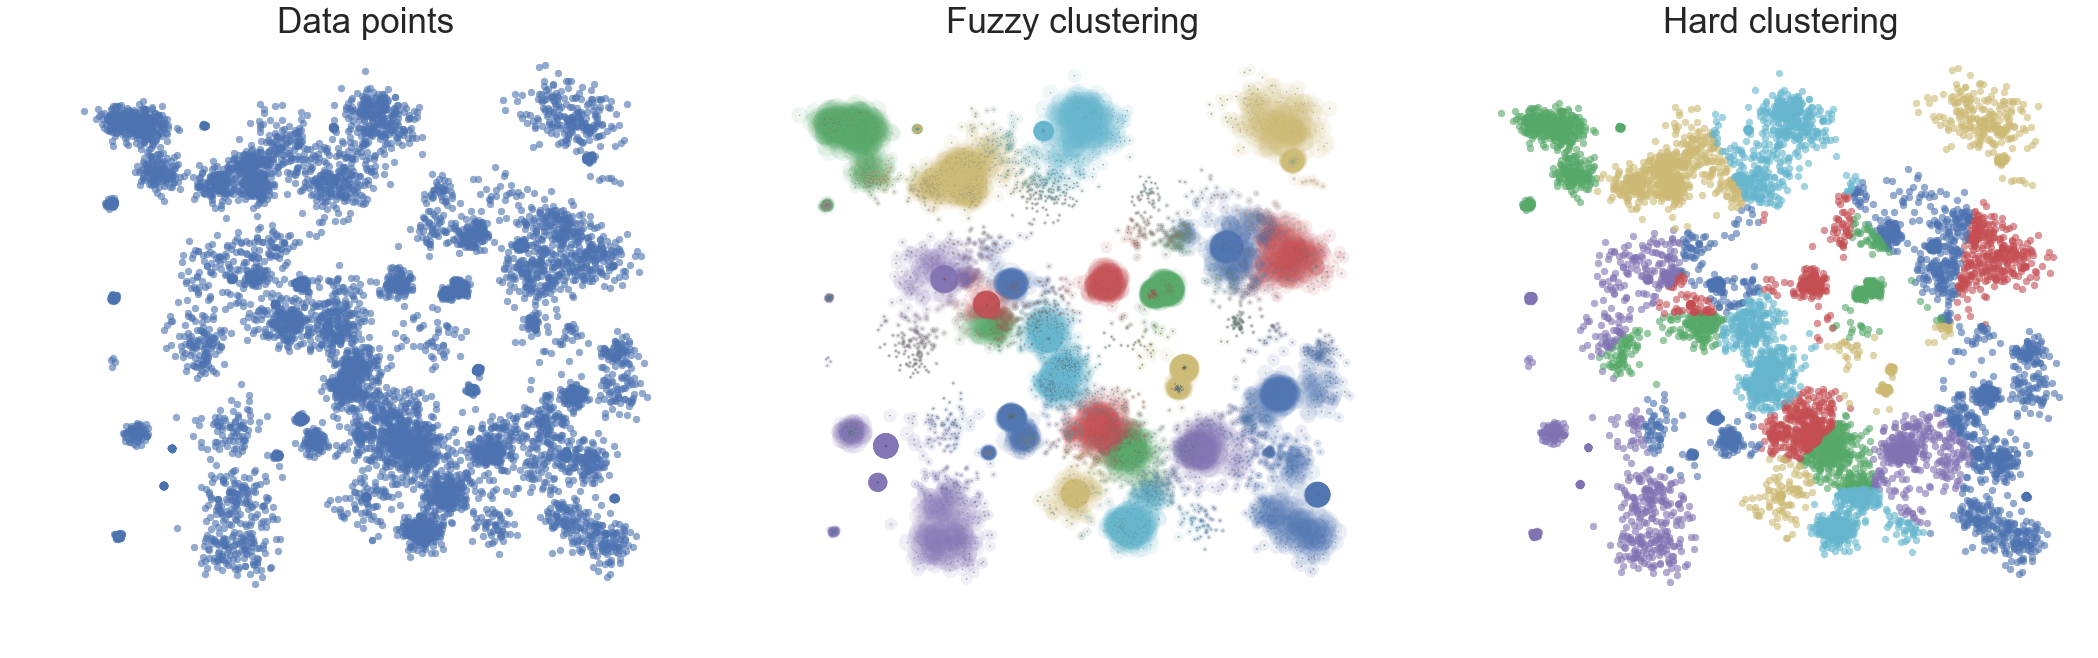

In [19]:
data = load_birch3_data(scale = 'True')
data = data[np.arange(0,100000,10),:2]
c=25
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypaperbirch3.pdf')

Finished after 2.267592106666683
24 iterations until termination.
Max within cluster distance to center: 1.495183
Mean within cluster distance to center: 0.268759
Sum of within cluster squared errors: 548.966310


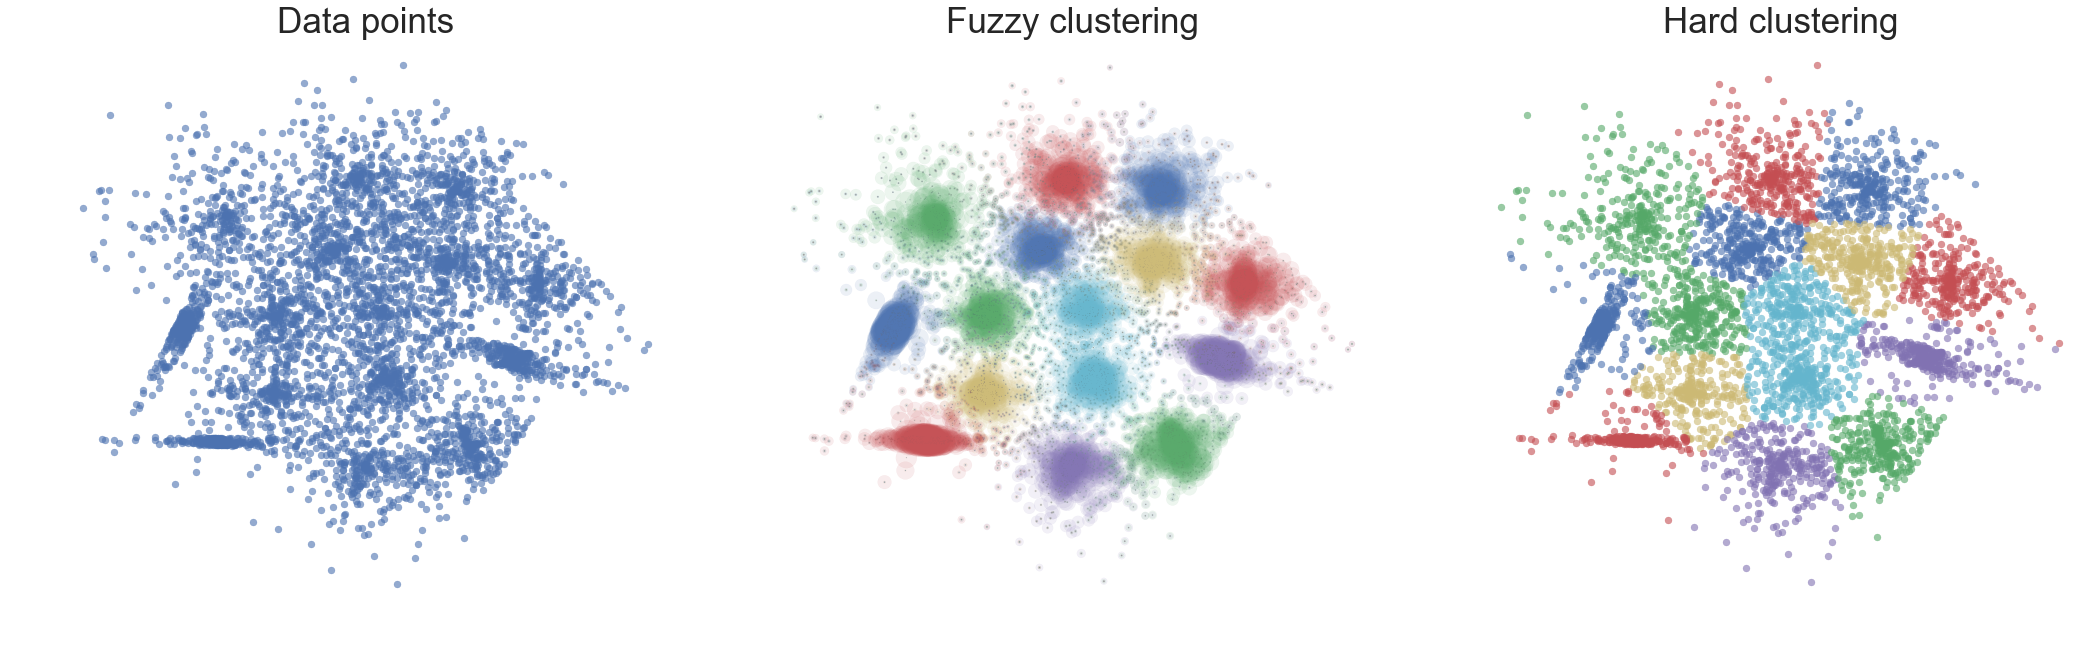

In [25]:
sets=load_sets_data(scale = 'True')
data = sets[:,:2]
c=15
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk,  c, save=True,name='images/fuzzypapersets.pdf')